In [ ]:
#ALUMNO: JUAN DIEGO POZO ORTIZ 
#CÓDIGO: 20210679

In [2]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
thailandMaps='https://github.com/juandiegopozo-10/tareadatos3/raw/main/maps/thailandMaps_4239.gpkg'

#layers in maps
listlayers(thailandMaps)

['country', 'cities', 'rivers']

In [3]:
thailand=gpd.read_file(thailandMaps,layer='country')
thailand_cities=gpd.read_file(thailandMaps,layer='cities')
thailand_rivers=gpd.read_file(thailandMaps,layer='rivers')

In [4]:
thailand.crs.to_epsg()==thailand_cities.crs.to_epsg()==thailand_rivers.crs.to_epsg()

True

<Axes: >

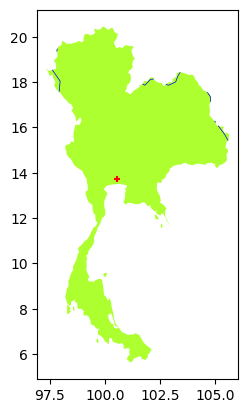

In [5]:
# plotting
base = thailand.plot(facecolor="greenyellow")
thailand_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
thailand_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [6]:
thailand

,COUNTRY,geometry
0,Thailand,"MULTIPOLYGON (((102.91972 11.63392, 102.91249 ..."


In [7]:
thailand.boundary

0    MULTILINESTRING ((102.91972 11.63392, 102.9124...
dtype: geometry

<Axes: >

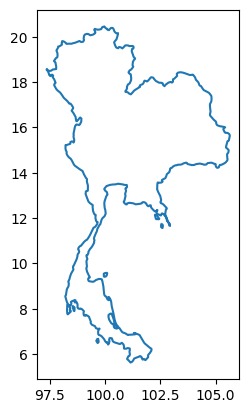

In [8]:
thailand.boundary.plot()

In [9]:
type(thailand.boundary)

geopandas.geoseries.GeoSeries

In [10]:
# converting into GDF
thailand.boundary.to_frame()

,0
0,"MULTILINESTRING ((102.91972 11.63392, 102.9124..."


In [11]:
# conversion
thailand_border=thailand.boundary.to_frame()

# new column (optional)
thailand_border['name']='Thailand'

# renaming the geometry column
thailand_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
thailand_border = thailand_border.set_geometry("geometry")

# verifying:
thailand_border.crs

<Geographic 2D CRS: EPSG:4239>
Name: Indian 1954
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Myanmar (Burma) - onshore; Thailand - onshore.
- bounds: (92.2, 5.63, 105.64, 28.55)
Datum: Indian 1954
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [12]:
thailand_border

,geometry,name
0,"MULTILINESTRING ((102.91972 11.63392, 102.9124...",Thailand
